### setup

In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np

import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.ion()

from PIL import Image

from datetime import datetime
from coastsat import SDS_upsampling



c:\Users\walte\.conda\envs\coastnurbs\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### testing upsampling

In [14]:
# testing upsampling module
image_path = 'data/dharavandhoo/jpg_files/preprocessed\RGB/2018-01-07-05-37-07_RGB_S2.jpg'
sub_images, padding_list,target_size = SDS_upsampling.extract_sub_images(image_path, 128, 20)
#run the upsampling - this will take a while!
up_sub_images = SDS_upsampling.upsample_subimages(sub_images)

x_steps=3, y_steps=2, x_step_size=66, y_step_size=76
Extracting sub-images...
original image size: (259, 204)
sub-image size: 128
{'left': 0, 'right': 131, 'top': 0, 'bottom': 76}
{'left': 0, 'right': 131, 'top': 76, 'bottom': 0}
{'left': 66, 'right': 65, 'top': 0, 'bottom': 76}
{'left': 66, 'right': 65, 'top': 76, 'bottom': 0}
{'left': 131, 'right': 0, 'top': 0, 'bottom': 76}
{'left': 131, 'right': 0, 'top': 76, 'bottom': 0}


100%|██████████| 100/100 [03:10<00:00,  1.91s/it]


In [15]:
#pad images with empty pixels
padded_images = SDS_upsampling.pad_sub_images(up_sub_images, padding_list,target_size)
#reassemble images
new_image = SDS_upsampling.reassemble_images(padded_images)

(1036, 816)


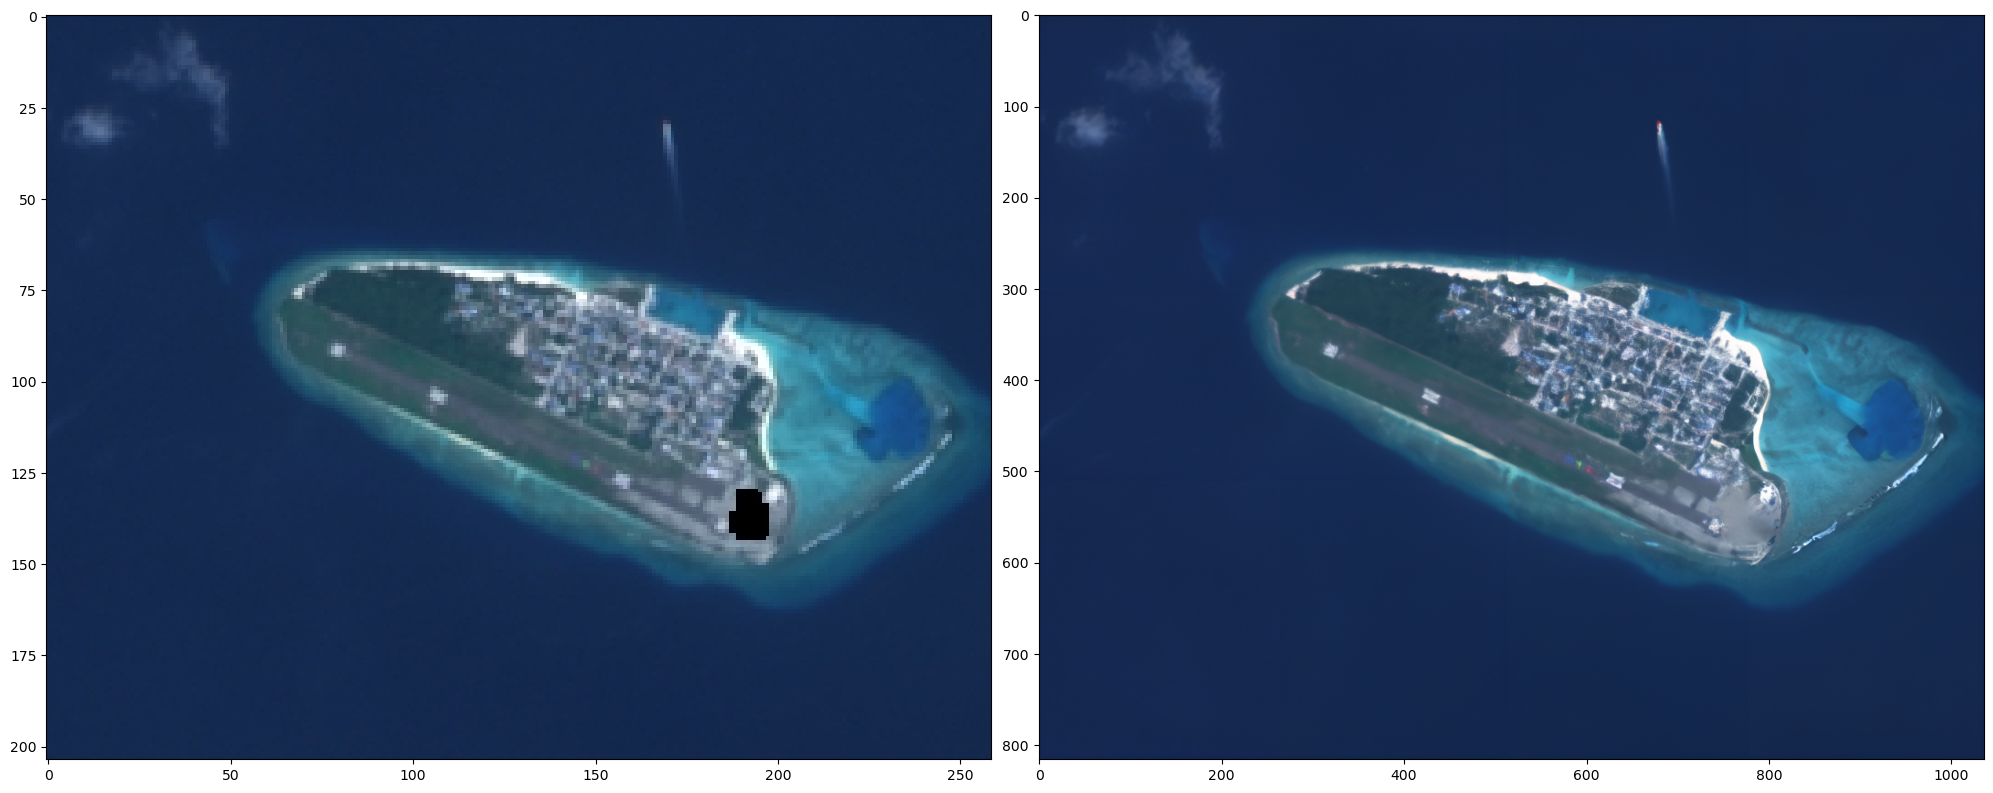

In [28]:
#display images in a grid

img = Image.open(image_path)

%matplotlib inline
fig = plt.figure(figsize=[25,25])
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.05, hspace=0.05)

plt.subplot(gs[0]).imshow(img)

plt.subplot(gs[1]).imshow(new_image)